# Effects frame initialization

This nb plots the whitening error for different frame initializations at varying dimensionality.

This plots results from `grassmann_vs_randn_submit.py`, which submitted hundreds of Slurm jobs, each running a frame whitening algo w/ varying dimensionality and frame initializations.

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
os.chdir(os.path.expanduser(f'~/frame_whitening'))
print(os.getcwd())

/mnt/home/lduong/frame_whitening


## Plot data from large distributed experiment

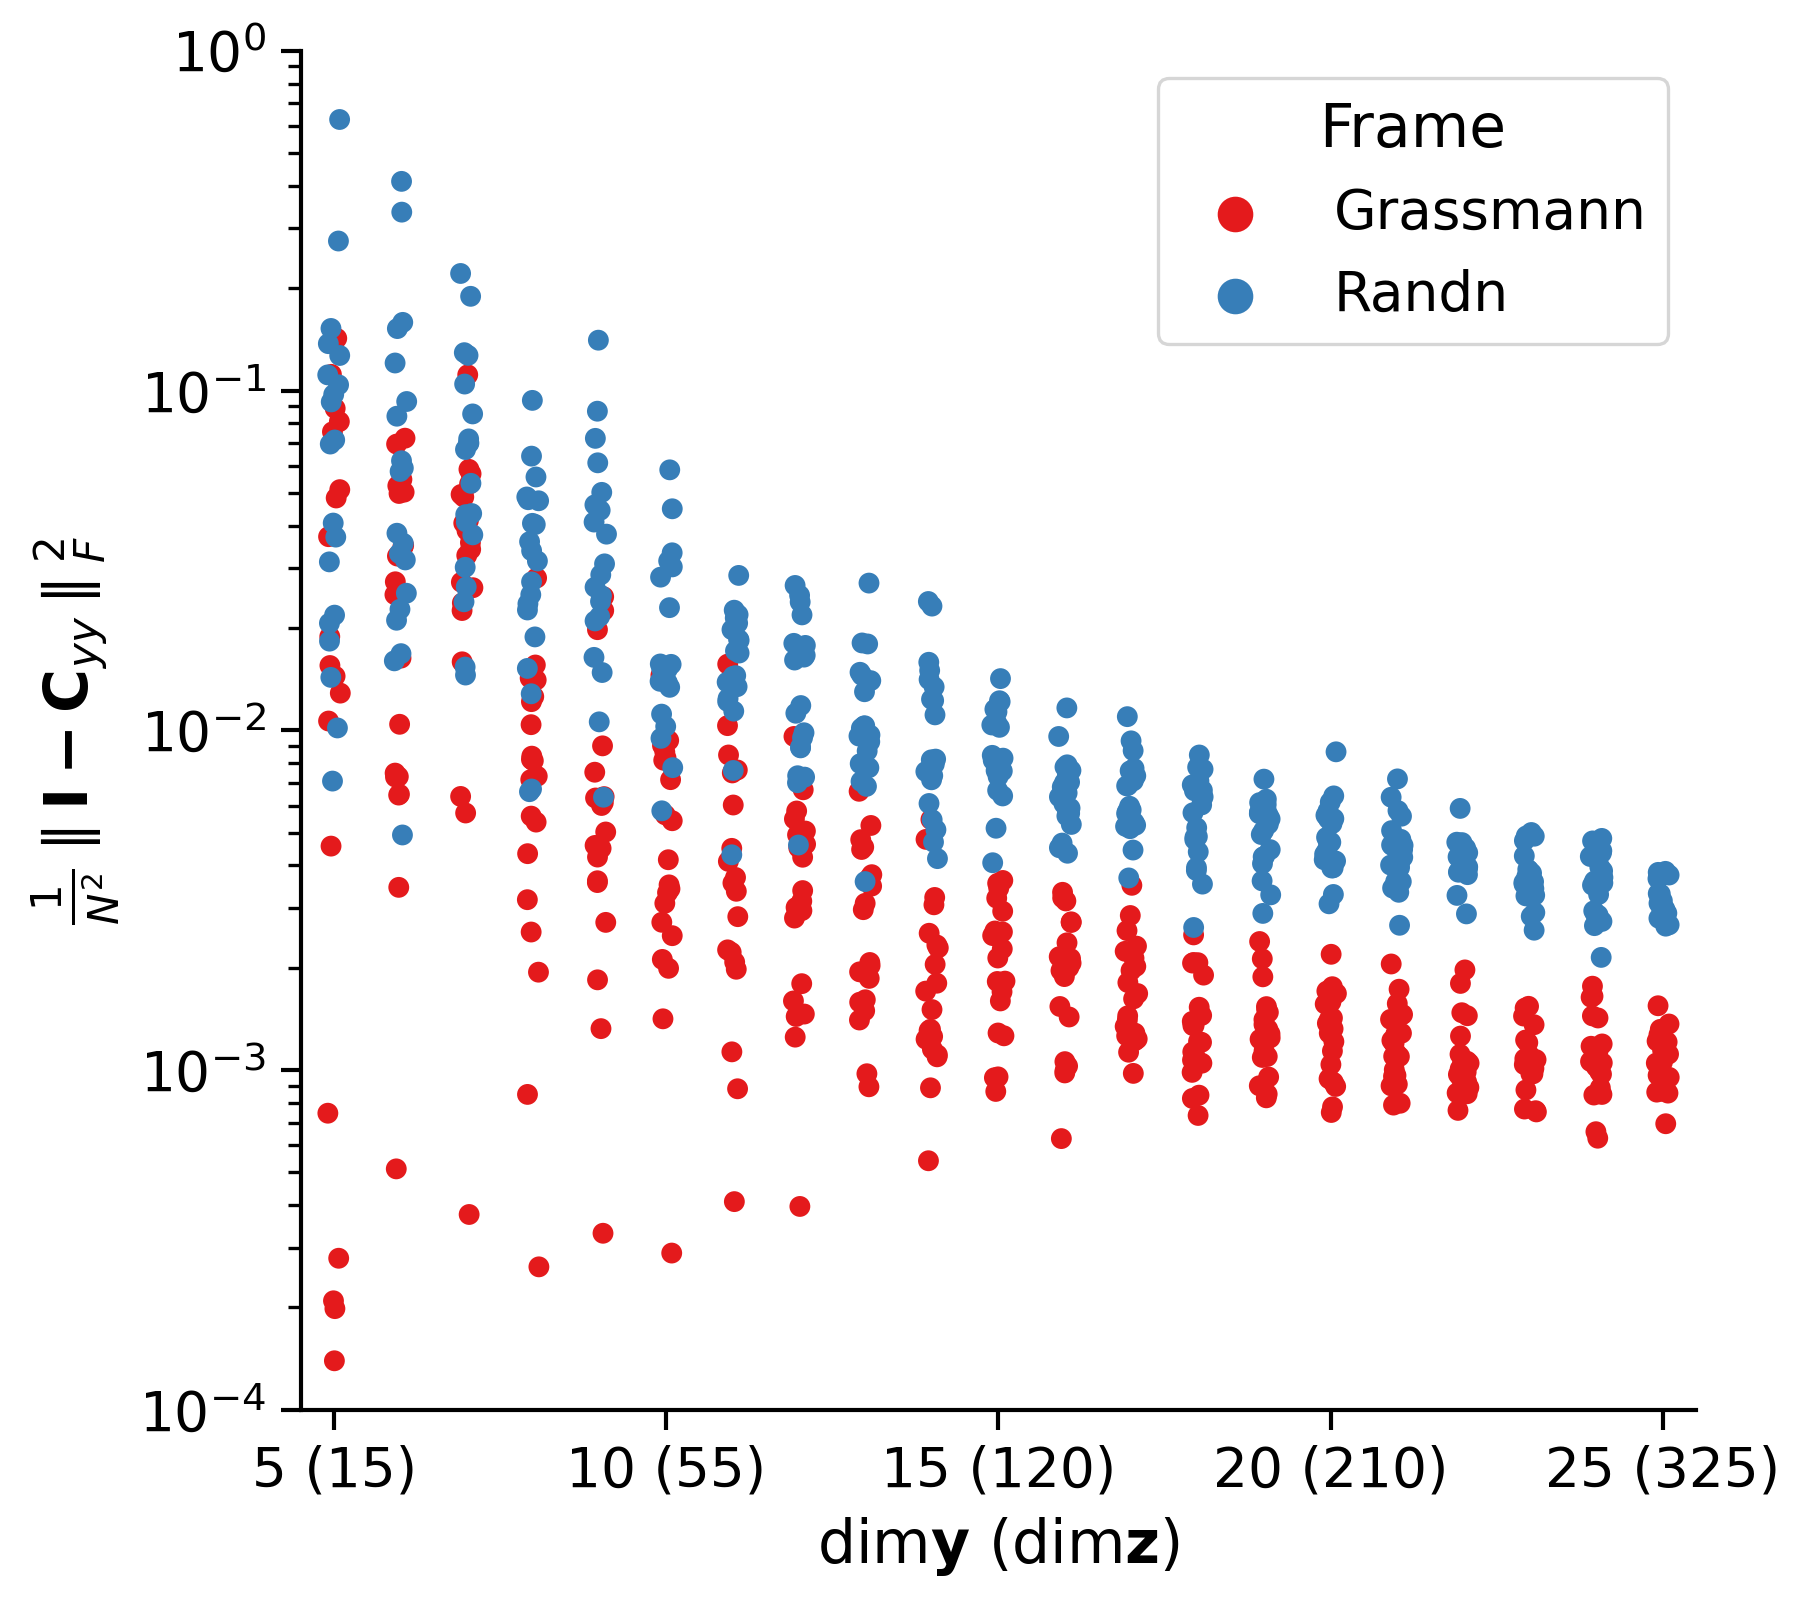

In [7]:
df_sim = pd.read_csv("outputs/2022_05_18/10_03_22/dim_experiment_results.csv")
df_sim.rename(columns={"frame": "Frame"}, inplace=True)

error = df_sim.error
df_sim.error_trace = df_sim.error_trace.apply(lambda x: np.sqrt((x) ** 2))
df_sim["Frame"] = df_sim["Frame"].apply(lambda x: x.title())

with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=300)
    sns.stripplot(
        x="n",
        y="error_fro",
        data=df_sim,
        hue="Frame",
        palette="Set1",
        ax=ax,
        alpha=1.0,
        **{"edgecolor": "none"},
    )

    # Axis
    n = max(df_sim.n)
    N = np.arange(0, n, 5)
    K = (N + 5) * ((N + 5) + 1) // 2
    xticklabels = [f"{n+5} ({k})" for n, k in zip(N, K)]
    ax.set(
        ylabel=r"$\frac{1}{N^2}\parallel{\bf I - C}_{yy} \parallel_F^2$",
        xlabel=r"dim$\bf y$ (dim$\bf z$)",
        ylim=(1e-4, 1e0),
        xticks=N,
        xticklabels=xticklabels,
        yscale="log",
    )
    sns.despine()


In [ ]:
fig.savefig(
    "figures/fig_outputs/dim_experiment.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)